## 연평균인구증감률 (2016년~2020년)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# 한글 문제
# matplotlib의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [3]:
df = pd.read_excel('./data/pop_10-21_total.xlsx', engine='openpyxl')
df.tail(20)

,SIG_CD,지역,행정구역(시군구)별,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
258,NaN,경남,사천남양출장소,-,-,-,-,-,-,-,-,-,-,0,-
259,48250.0,경남,김해시,503348,507062,513260,522049,527240,528865,529422,532132,533672,542455,542338,537673
260,NaN,경남,장유출장소,-,-,-,-,-,-,-,-,-,-,0,-
261,48270.0,경남,밀양시,110479,109329,108755,108342,107765,107896,108354,107898,106744,105552,104831,103525
262,48310.0,경남,거제시,228355,232787,236944,242077,248287,255828,257183,254073,250516,248276,245754,241216
263,48330.0,경남,양산시,260239,266403,270460,279565,292376,301291,317037,338535,348639,350759,352229,354726
264,NaN,경남,양산시웅상출장소,-,-,-,-,-,-,-,-,-,-,0,-
265,48720.0,경남,의령군,30162,30045,30329,29417,29209,28544,28111,27849,27667,27168,26800,26322
266,48730.0,경남,함안군,67207,66971,67425,67667,68741,69156,68937,68207,67025,65700,64182,62547
267,48740.0,경남,창녕군,61714,62490,62966,63447,63502,63817,63982,64101,63396,62331,61301,60129


In [4]:
df.replace(['-', 0], np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SIG_CD      250 non-null    float64
 1   지역          278 non-null    object 
 2   행정구역(시군구)별  278 non-null    object 
 3   2010        261 non-null    float64
 4   2011        261 non-null    float64
 5   2012        261 non-null    float64
 6   2013        261 non-null    float64
 7   2014        262 non-null    float64
 8   2015        262 non-null    float64
 9   2016        262 non-null    float64
 10  2017        262 non-null    float64
 11  2018        262 non-null    float64
 12  2019        262 non-null    float64
 13  2020        262 non-null    float64
 14  2021        262 non-null    float64
dtypes: float64(13), object(2)
memory usage: 32.7+ KB


In [5]:
df.dropna(subset=['SIG_CD'], inplace=True)
df.dropna(subset=[2016, 2020], how='all', axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 277
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SIG_CD      250 non-null    float64
 1   지역          250 non-null    object 
 2   행정구역(시군구)별  250 non-null    object 
 3   2010        249 non-null    float64
 4   2011        249 non-null    float64
 5   2012        249 non-null    float64
 6   2013        249 non-null    float64
 7   2014        250 non-null    float64
 8   2015        250 non-null    float64
 9   2016        250 non-null    float64
 10  2017        250 non-null    float64
 11  2018        250 non-null    float64
 12  2019        250 non-null    float64
 13  2020        250 non-null    float64
 14  2021        250 non-null    float64
dtypes: float64(13), object(2)
memory usage: 31.2+ KB


In [6]:
df['SIG_CD'] = df['SIG_CD'].astype('int')
df.replace(np.nan, 0,inplace=True)
df.loc[:, 2010:2021] = df.loc[:, 2010:2021].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 277
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SIG_CD      250 non-null    int32 
 1   지역          250 non-null    object
 2   행정구역(시군구)별  250 non-null    object
 3   2010        250 non-null    int32 
 4   2011        250 non-null    int32 
 5   2012        250 non-null    int32 
 6   2013        250 non-null    int32 
 7   2014        250 non-null    int32 
 8   2015        250 non-null    int32 
 9   2016        250 non-null    int32 
 10  2017        250 non-null    int32 
 11  2018        250 non-null    int32 
 12  2019        250 non-null    int32 
 13  2020        250 non-null    int32 
 14  2021        250 non-null    int32 
dtypes: int32(13), object(2)
memory usage: 18.6+ KB


In [7]:
target = pd.read_csv('./data/인구감소지역.csv', encoding='euc-kr')
target

,SIG_CD,지역,행정구역(시군구)별,인구감소지역
0,11110,서울,종로구,안심
1,11140,서울,중구,안심
2,11170,서울,용산구,안심
3,11200,서울,성동구,안심
4,11215,서울,광진구,안심
...,...,...,...,...
245,48870,경남,함양군,감소
246,48880,경남,거창군,감소
247,48890,경남,합천군,감소
248,50110,제주,제주시,안심


In [8]:
df1 = pd.merge(df, target[['SIG_CD', '인구감소지역']], how='outer', on='SIG_CD')
df1.tail()

,SIG_CD,지역,행정구역(시군구)별,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,인구감소지역
245,48870,경남,함양군,41197,41081,40714,40692,40584,40339,40241,40175,40044,39637,39080,38310,감소
246,48880,경남,거창군,63421,63146,63103,63177,63137,63232,63308,62763,62455,62179,61502,61073,감소
247,48890,경남,합천군,51092,50608,50279,50290,50457,49145,48026,47000,45916,45204,44006,42935,감소
248,50110,제주,제주시,417539,422790,429656,438165,448834,459876,470665,478700,485946,489405,492466,493096,안심
249,50130,제주,서귀포시,153716,153366,154057,155641,158512,164519,170932,178383,181245,181584,182169,183663,안심


In [9]:
df1.rename(columns={'인구감소지역':'지역구분'}, inplace=True)
df1.columns

Index([    'SIG_CD',         '지역', '행정구역(시군구)별',         2010,         2011,
               2012,         2013,         2014,         2015,         2016,
               2017,         2018,         2019,         2020,         2021,
             '지역구분'],
      dtype='object')

In [10]:
df1['지역구분'].replace('감소', '인구감소지역', inplace=True)
df1.replace('관심', '관심지역', inplace=True)
df1.replace('안심', '안심지역', inplace=True)

In [12]:
pop_rate_5y = ((df1[2020]/df1[2016])**(1/4) - 1)*100
df1['연평균인구증감률(5년)'] = round(pop_rate_5y, 4)
df1.head(3)

,SIG_CD,지역,행정구역(시군구)별,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,지역구분,연평균인구증감률(5년)
0,11110,서울,종로구,170578,168382,165207,160070,156993,154986,152737,154770,153065,151290,149384,144683,안심지역,-0.5534
1,11140,서울,중구,132822,133193,133360,130465,128065,125733,125249,125709,125725,126171,125240,122499,안심지역,-0.0018
2,11170,서울,용산구,244853,246501,243232,239740,235951,233342,230241,229161,228999,228670,230040,222953,안심지역,-0.0218


In [13]:
df1['지역'].unique()

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [14]:
mask1 = ['부산', '대구', '인천', '광주', '대전', '울산', '경기', '강원', '충북','충남', '전북', '전남', '경북', '경남']
isin_filter = df1['지역'].isin(mask1)
df1_targetcity = df1[isin_filter]
df1_targetcity

,SIG_CD,지역,행정구역(시군구)별,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,지역구분,연평균인구증감률(5년)
25,26110,부산,중구,49442,48686,48148,47345,46737,45816,45208,44218,42795,41910,41523,40524,관심지역,-2.1032
26,26140,부산,서구,126040,123718,120828,118783,118115,115963,112973,110039,110534,108229,108135,105164,인구감소지역,-1.0882
27,26170,부산,동구,101514,100420,98529,96011,94565,92069,89826,88868,86912,88165,88901,87679,인구감소지역,-0.2584
28,26200,부산,영도구,146798,143205,139765,135816,132102,129385,126362,123521,120109,116711,113342,110638,인구감소지역,-2.6819
29,26230,부산,부산진구,395826,395044,392731,389765,387378,381572,376526,371703,362357,357880,359886,353159,안심지역,-1.1236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,48850,경남,하동군,51509,53975,50806,50177,49223,50259,49622,48831,47533,46574,44785,43449,인구감소지역,-2.5314
244,48860,경남,산청군,35591,35651,35691,35935,35849,36071,36098,36340,35952,35417,34857,34360,인구감소지역,-0.8708
245,48870,경남,함양군,41197,41081,40714,40692,40584,40339,40241,40175,40044,39637,39080,38310,인구감소지역,-0.7292
246,48880,경남,거창군,63421,63146,63103,63177,63137,63232,63308,62763,62455,62179,61502,61073,인구감소지역,-0.7209


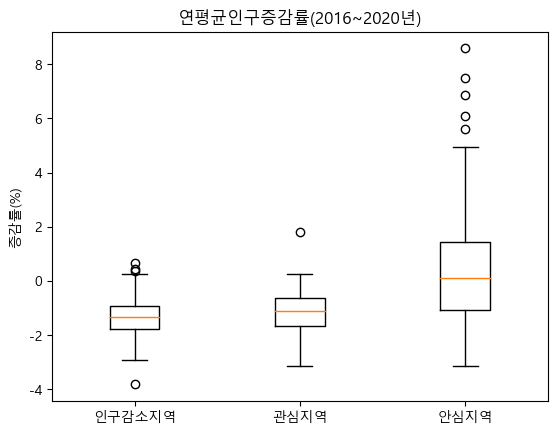

In [21]:
plt.boxplot(x=[df1_targetcity[df1_targetcity['지역구분']=='인구감소지역']['연평균인구증감률(5년)'],
                          df1_targetcity[df1_targetcity['지역구분']=='관심지역']['연평균인구증감률(5년)'],
                          df1_targetcity[df1_targetcity['지역구분']=='안심지역']['연평균인구증감률(5년)']],
                          labels=['인구감소지역', '관심지역', '안심지역'])
plt.title('연평균인구증감률(2016~2020년)')
plt.ylabel('증감률(%)')

plt.savefig('./output/graph_1-1')
plt.show()

In [16]:
grouped = df1_targetcity.groupby(['지역구분'])
print(grouped,'\n')

for key, group in grouped:
    print('* key :', key)
    print('* number :', len(group))
    print(group.head(2))
    print('\n')


* key : 관심지역
* number : 18
    SIG_CD  지역 행정구역(시군구)별    2010    2011    2012    2013    2014    2015  \
25   26110  부산         중구   49442   48686   48148   47345   46737   45816   
35   26410  부산        금정구  255419  254720  255692  253526  249856  246026   

      2016    2017    2018    2019    2020    2021  지역구분  연평균인구증감률(5년)  
25   45208   44218   42795   41910   41523   40524  관심지역       -2.1032  
35  244624  244469  242956  239062  232666  228049  관심지역       -1.2451  


* key : 안심지역
* number : 115
    SIG_CD  지역 행정구역(시군구)별    2010    2011    2012    2013    2014    2015  \
29   26230  부산       부산진구  395826  395044  392731  389765  387378  381572   
30   26260  부산        동래구  282779  283742  278767  276689  275971  272837   

      2016    2017    2018    2019    2020    2021  지역구분  연평균인구증감률(5년)  
29  376526  371703  362357  357880  359886  353159  안심지역       -1.1236  
30  272745  270727  266515  271247  270745  266866  안심지역       -0.1838  


* key : 인구감소지역
* number : 89
    SIG_C

In [22]:
rate_mean = grouped['연평균인구증감률(5년)'].mean().round(4)

<function matplotlib.pyplot.show(close=None, block=None)>

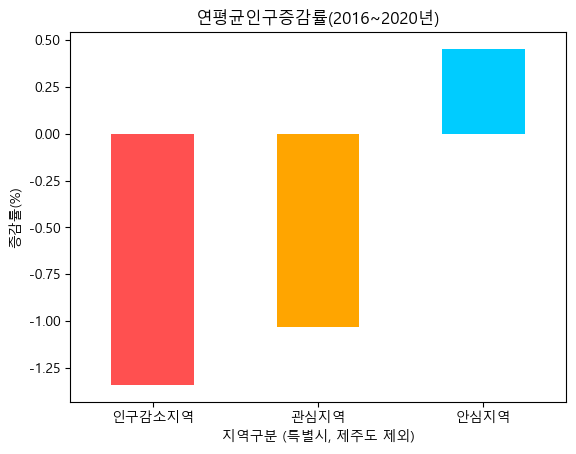

In [23]:
order = ['인구감소지역', '관심지역', '안심지역']
rate_mean = rate_mean[order]
rate_mean.plot(kind='bar',
               color=['#ff5050', 'orange', '#00ccff'],
               )
plt.title('연평균인구증감률(2016~2020년)')
plt.xlabel('지역구분 (특별시, 제주도 제외)')
plt.ylabel('증감률(%)')
plt.xticks(rotation='horizontal')
plt.savefig('./output/graph_1-2')
plt.show